In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt
from sklearn import preprocessing
from matplotlib.dates import HourLocator, DateFormatter


In [2]:
nov1 = pd.read_excel('/Users/varungandhi/Downloads/radiosonde_24nov.xlsx', sheet_name= '24nov_00',
                    header= [3,4])

nov1.columns = nov1.columns.map('_'.join)
nov1 = nov1.iloc[1:,:]


nov2 = pd.read_excel('/Users/varungandhi/Downloads/radiosonde_24nov.xlsx', sheet_name= '24nov_12',
                    header= [3,4])

nov2.columns = nov2.columns.map('_'.join)
nov2 = nov2.iloc[1:,:]


nov3 = pd.read_excel('/Users/varungandhi/Downloads/radiosonde_24nov.xlsx', sheet_name= '25nov_00',
                   header= [3,4])

nov3.columns = nov3.columns.map('_'.join)
nov3 = nov3.iloc[1:,:]

In [3]:
feb1 = pd.read_excel('/Users/varungandhi/Downloads/radiosonde_24nov.xlsx', sheet_name= '2feb_12',header= [3,4])

feb1.columns = feb1.columns.map('_'.join)
feb1 = feb1.iloc[1:,:]


feb2 = pd.read_excel('/Users/varungandhi/Downloads/radiosonde_24nov.xlsx', sheet_name= '3feb_00',header= [3,4])

feb2.columns = feb2.columns.map('_'.join)
feb2 = feb2.iloc[1:,:]


feb3 = pd.read_excel('/Users/varungandhi/Downloads/radiosonde_24nov.xlsx', sheet_name= '3feb_12',header= [3,4])

feb3.columns = feb3.columns.map('_'.join)
feb3 = feb3.iloc[1:,:]

In [4]:
nov1['SKNT_knot'] = 0.51 * nov1['SKNT_knot']
nov2['SKNT_knot'] = 0.51 * nov2['SKNT_knot']
nov3['SKNT_knot'] = 0.51 * nov3['SKNT_knot']


nov1['THTV_K'] = -273.15+ nov1['THTV_K']
nov2['THTV_K'] = -273.15+ nov2['THTV_K']
nov3['THTV_K'] = -273.15+ nov3['THTV_K']

nov1['HGHT_m'] = -139+ nov1['HGHT_m']
nov2['HGHT_m'] = -139+ nov2['HGHT_m']
nov3['HGHT_m'] = -139+ nov3['HGHT_m']

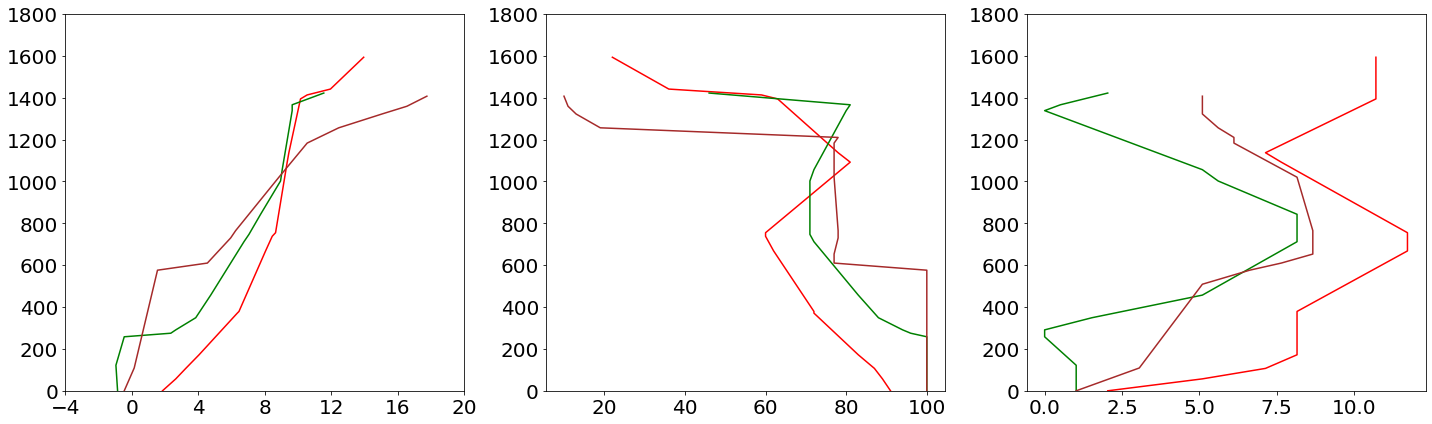

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,6))
ax1.plot(nov1['THTV_K']   [0:15],nov1['HGHT_m'][0:15], color = 'r')
ax1.plot(nov2['THTV_K']   [0:15],nov2['HGHT_m'][0:15], color = 'g')
ax1.plot(nov3['THTV_K']   [0:15],nov3['HGHT_m'][0:15], color = 'brown')
ax1.set_xlim([-4,20])
ax1.set_xticks(np.arange(-4,21,4))

ax2.plot(nov1['RELH_%'][0:15],nov1['HGHT_m'][0:15], color = 'r')
ax2.plot(nov2['RELH_%'][0:15],nov2['HGHT_m'][0:15], color = 'g')
ax2.plot(nov3['RELH_%'][0:15],nov3['HGHT_m'][0:15], color = 'brown')

ax3.plot(nov1['SKNT_knot'][0:15],nov1['HGHT_m'][0:15], color = 'r')
ax3.plot(nov2['SKNT_knot'][0:15],nov2['HGHT_m'][0:15], color = 'g')
ax3.plot(nov3['SKNT_knot'][0:15],nov3['HGHT_m'][0:15], color = 'brown')

for axi in (ax1,ax2,ax3):
    axi.tick_params(axis='x', which='both', labelsize=20)
    axi.tick_params(axis='y', which='both', labelsize=20)
    axi.set_ylim([0,1800])
    axi.set_yticks(np.arange(0,1801,200))
    


    
fig.tight_layout()

In [6]:
feb1

,PRES_hPa,HGHT_m,TEMP_C,DWPT_C,RELH_%,MIXR_g/kg,DRCT_deg,SKNT_knot,THTA_K,THTE_K,THTV_K
1,997,139,-0.1,-0.8,95,3.63,240,2,273.3,283.3,273.9
2,950,522,-3.3,-3.3,100,3.17,259,4,273.8,282.6,274.4
3,927,717,1.2,-0.2,90,4.09,269,6,280.4,291.9,281.1
4,925,734,1.4,0.2,92,4.22,270,6,280.7,292.6,281.4
5,909,875,1.2,0,92,4.22,310,12,281.9,293.9,282.6
...,...,...,...,...,...,...,...,...,...,...,...
93,10,30430,-58.3,-88.3,1,0.02,280,12,800.9,801.1,800.9
94,9,31102,-56.5,-87.3,1,0.02,280,19,832.4,832.7,832.4
95,8,31854,-54.4,-86.3,1,0.03,235,37,869,869.4,869
96,7,32706,-52.1,-85.1,1,0.04,250,35,912.4,913,912.4


In [8]:
feb2

,PRES_hPa,HGHT_m,TEMP_C,DWPT_C,RELH_%,MIXR_g/kg,DRCT_deg,SKNT_knot,THTA_K,THTE_K,THTV_K
1,996,139,-0.3,-0.3,100,3.77,140,4,273.2,283.5,273.8
2,952,500,-2.5,-2.5,100,3.37,190,10,274.5,283.9,275.1
3,951,508,-2.5,-2.5,100,3.36,192,11,274.6,283.9,275.1
4,936,636,0.4,0,97,4.11,215,25,278.8,290.3,279.5
5,925,731,2.6,1.9,95,4.77,225,33,282,295.4,282.8
...,...,...,...,...,...,...,...,...,...,...,...
118,10.9,29912,-61.1,-89.1,1,0.01,295,19,771.2,771.4,771.2
119,10,30450,-59.9,-88.9,1,0.01,245,16,794.9,795.1,794.9
120,9,31111,-58.2,-88.1,1,0.02,250,21,825.5,825.8,825.5
121,8.8,31252,-57.9,-87.9,1,0.02,NaN,NaN,832.2,832.5,832.2


In [9]:
feb1['SKNT_knot'] = 0.51 * feb1['SKNT_knot']
feb2['SKNT_knot'] = 0.51 * feb2['SKNT_knot']
feb3['SKNT_knot'] = 0.51 * feb3['SKNT_knot']


feb1['THTV_K'] = -273.15+ feb1['THTV_K']
feb2['THTV_K'] = -273.15+ feb2['THTV_K']
feb3['THTV_K'] = -273.15+ feb3['THTV_K']

feb1['HGHT_m'] = -139+ feb1['HGHT_m']
feb2['HGHT_m'] = -139+ feb2['HGHT_m']
feb3['HGHT_m'] = -139+ feb3['HGHT_m']

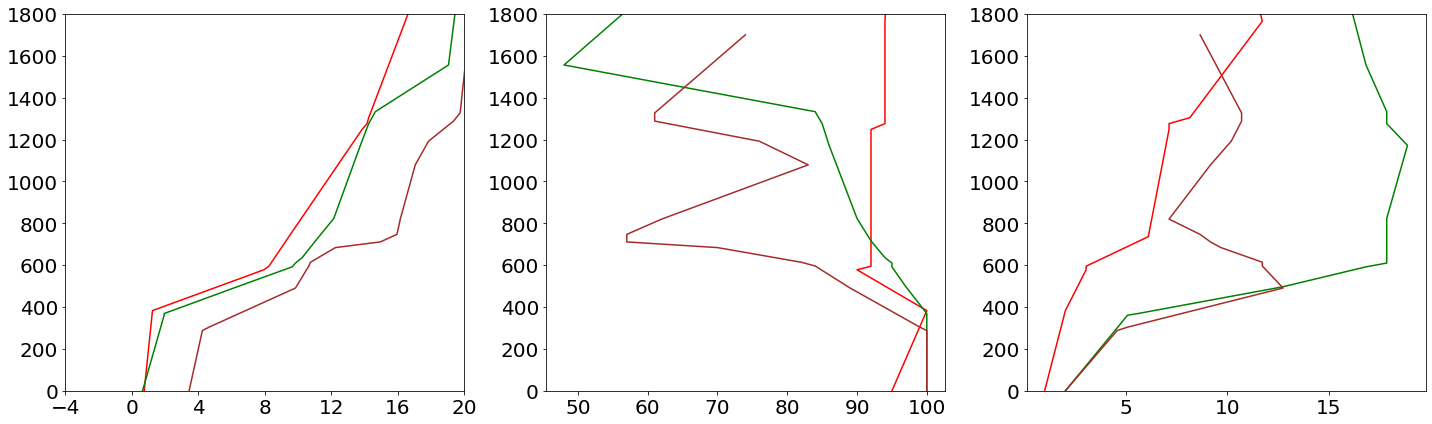

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,6))
ax1.plot(feb1['THTV_K']   [0:15],feb1['HGHT_m'][0:15], color = 'r')
ax1.plot(feb2['THTV_K']   [0:15],feb2['HGHT_m'][0:15], color = 'g')
ax1.plot(feb3['THTV_K']   [0:15],feb3['HGHT_m'][0:15], color = 'brown')


ax2.plot(feb1['RELH_%']   [0:15],feb1['HGHT_m'][0:15], color = 'r')
ax2.plot(feb2['RELH_%']   [0:15],feb2['HGHT_m'][0:15], color = 'g')
ax2.plot(feb3['RELH_%']   [0:15],feb3['HGHT_m'][0:15], color = 'brown')

ax3.plot(feb1['SKNT_knot'][0:15],feb1['HGHT_m'][0:15], color = 'r')
ax3.plot(feb2['SKNT_knot'][0:15],feb2['HGHT_m'][0:15], color = 'g')
ax3.plot(feb3['SKNT_knot'][0:15],feb3['HGHT_m'][0:15], color = 'brown')

for axi in (ax1,ax2,ax3):
    axi.tick_params(axis='x', which='both', labelsize=20)
    axi.tick_params(axis='y', which='both', labelsize=20)
    axi.set_ylim([0,1800])
    axi.set_yticks(np.arange(0,1801,200))
    
ax1.set_xlim([-4,20])
ax1.set_xticks(np.arange(-4,21,4))
    
fig.tight_layout()